In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Input
from keras import optimizers
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data1='/content/drive/MyDrive/Colab Notebooks/WTI.csv'
data2='/content/drive/MyDrive/Colab Notebooks/SILVER.csv'
data3='/content/drive/MyDrive/Colab Notebooks/BRENTCRUDEOIL.csv'
wti=pd.read_csv(data1)
silver=pd.read_csv(data2)
brent=pd.read_csv(data3)

In [ ]:
wti.isnull().sum()

date      0
ouv       0
haut      0
bas       0
clot      0
vol       0
devise    0
dtype: int64

In [ ]:
wti.shape

(1277, 7)

In [ ]:
silver.isnull().sum()

date      0
ouv       0
haut      0
bas       0
clot      0
vol       0
devise    0
dtype: int64

In [ ]:
brent.isnull().sum()

date      0
ouv       0
haut      0
bas       0
clot      0
vol       0
devise    0
dtype: int64

In [ ]:
wti.set_index('date', inplace=True)
wti2=wti['24/04/2020 00:00':]
wti2.head(1)

,ouv,haut,bas,clot,vol,devise
date,,,,,,
24/04/2020 00:00,17.39,17.96,15.64,17.13,42792,USD


In [ ]:
silver.set_index('date', inplace=True)
silver2=silver['24/04/2020 00:00':]

In [ ]:
brent.set_index('date', inplace=True)
brent2=brent['24/04/2020 00:00':]

Text(0.5, 0, 'WTI')

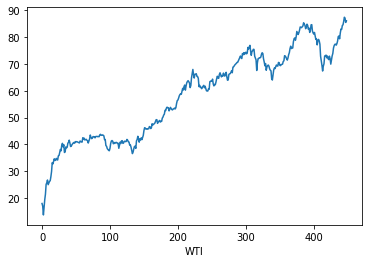

In [ ]:
wti1=wti2.iloc[:,1:2].values
plt.plot(wti1)
plt.xlabel("WTI")

Text(0.5, 0, 'Silver')

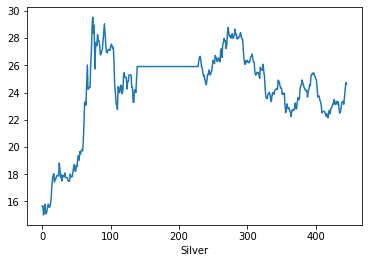

In [ ]:
silver1=silver2.iloc[:,1:2].values
plt.plot(silver1)
plt.xlabel("Silver")

Text(0.5, 0, 'Brent')

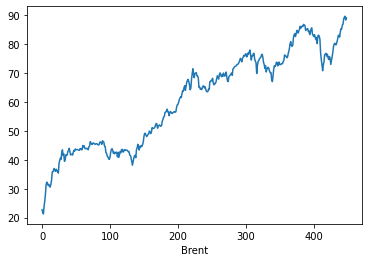

In [ ]:
brent1=brent2.iloc[:,1:2].values
plt.plot(brent1)
plt.xlabel("Brent")

In [ ]:
wti3=wti2['ouv']

In [ ]:
silver3=silver2['ouv']

In [ ]:
brent3=brent2['ouv']

In [ ]:
data=pd.concat([wti3.rename('wti'),silver3.rename('silver'),brent3.rename('brent')], axis=1)
data.head(100)

,wti,silver,brent
date,,,
24/04/2020 00:00,17.39,15.43,21.93
27/04/2020 00:00,16.94,15.43,21.55
28/04/2020 00:00,12.47,15.01,19.90
29/04/2020 00:00,13.21,15.01,20.66
30/04/2020 00:00,15.95,15.40,22.87
...,...,...,...
08/09/2020 00:00,39.24,26.92,42.08
09/09/2020 00:00,36.66,26.58,39.65
10/09/2020 00:00,37.78,26.58,40.58


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

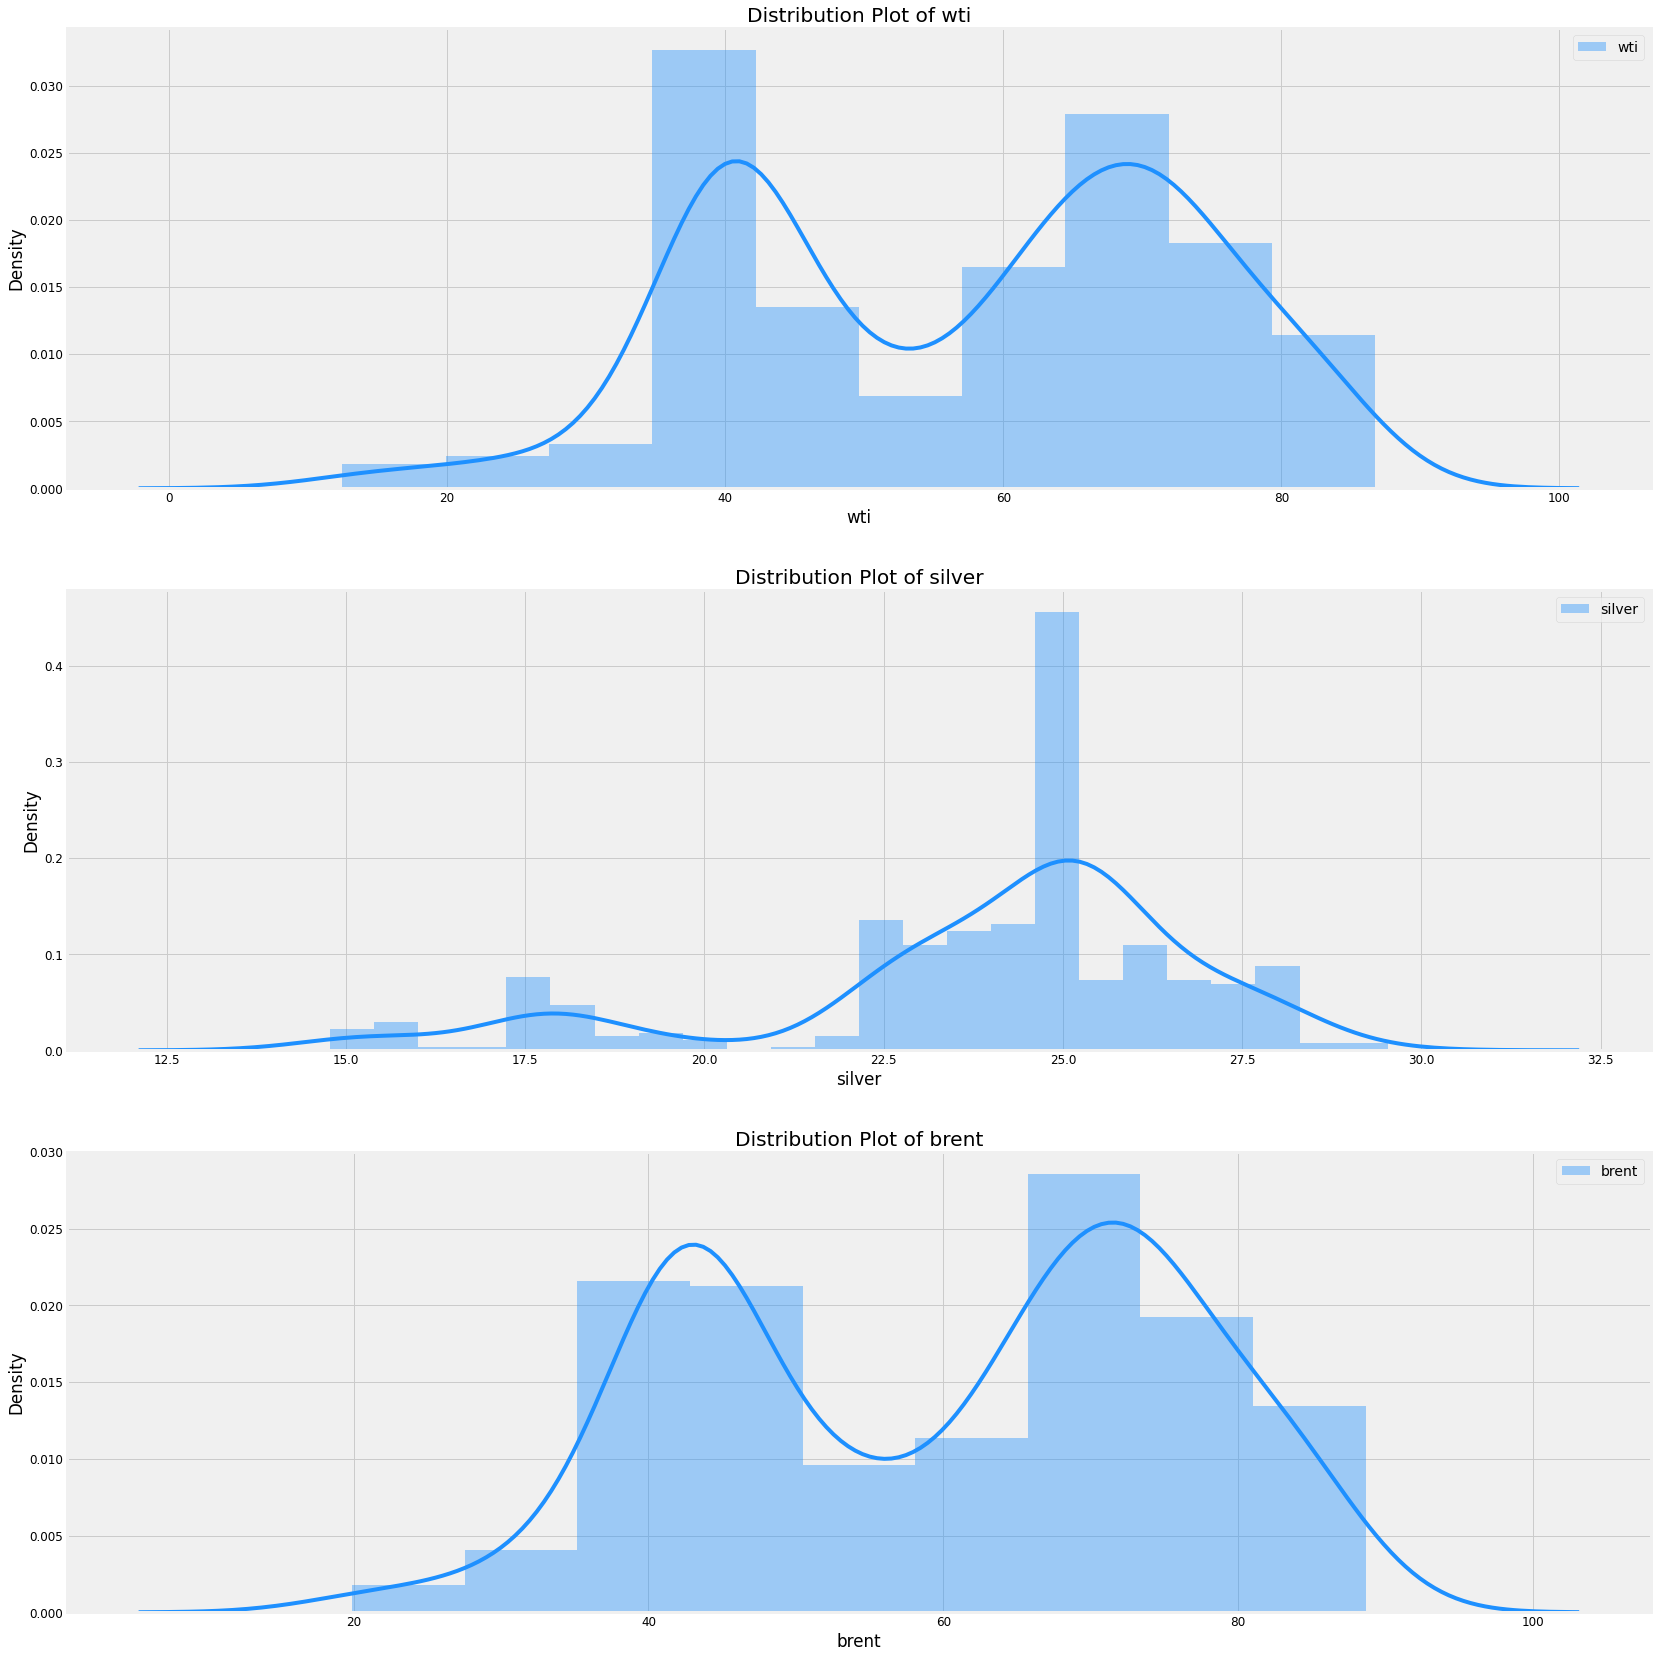

In [ ]:
fig = plt.figure(figsize=(24, 24))
plt.style.use('fivethirtyeight')
col_names = data.columns
for i in range(3):
  ax = fig.add_subplot(3,1,i+1)
  sns.distplot(data.iloc[:,i],label=col_names[i],color='dodgerblue').set_title("Distribution Plot of {}".format(col_names[i]),axes=ax)
  ax.tick_params(labelsize=12)
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()

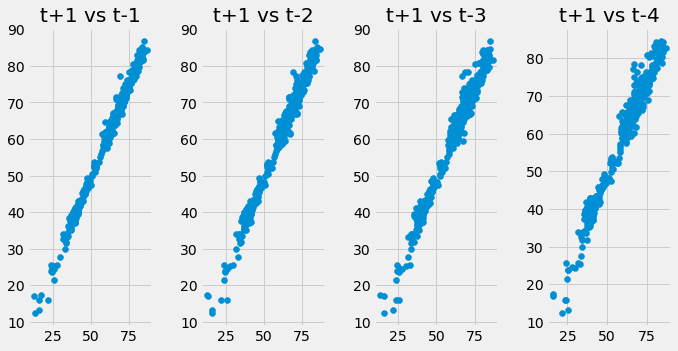

In [ ]:
plt.figure(figsize=(10,10))
pd.plotting.lag_plot(data['wti'])
wti_series = data['wti']
n_lags = 4
cols = [wti_series]

for i in range(1,(n_lags + 1)):
	cols.append(wti_series.shift(i))
df = pd.concat(cols, axis=1)
cols = ['t+1']
for i in range(1,(n_lags + 1)):
	cols.append('t-' + str(i))
df.columns = cols
plt.figure(1)
for i in range(1,(n_lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	plt.scatter(x=df['t+1'].values, y=df['t-'+str(i)].values)
plt.tight_layout(pad=2)
plt.show()

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
data_scaled= sc.fit_transform(data)
data_scaled

array([[0.06622695, 0.0440678 , 0.02952727],
       [0.06016961, 0.0440678 , 0.024     ],
       [0.        , 0.01559322, 0.        ],
       ...,
       [       nan, 0.62847458,        nan],
       [       nan, 0.56983051,        nan],
       [       nan, 0.57830508,        nan]])

In [ ]:
data_scaled.shape

(454, 3)

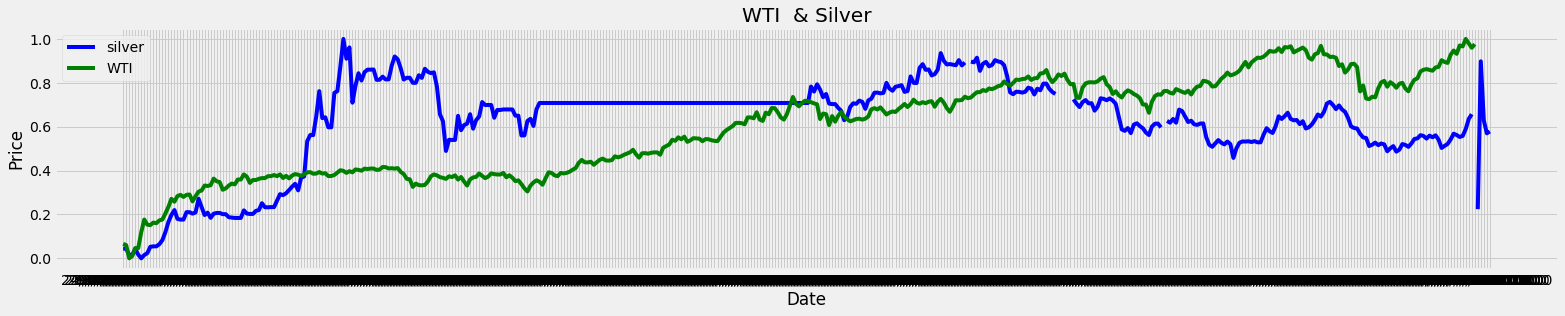

In [ ]:
fig = plt.figure(figsize=(24, 24))
ax = fig.add_subplot(5,1,i+1)
ax.plot(data.index,data_scaled[:,1],label=data.columns[1],c='blue')
ax.plot(data.index,data_scaled[:,0],label='WTI',c='green')
ax.set_title('WTI  & Silver')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

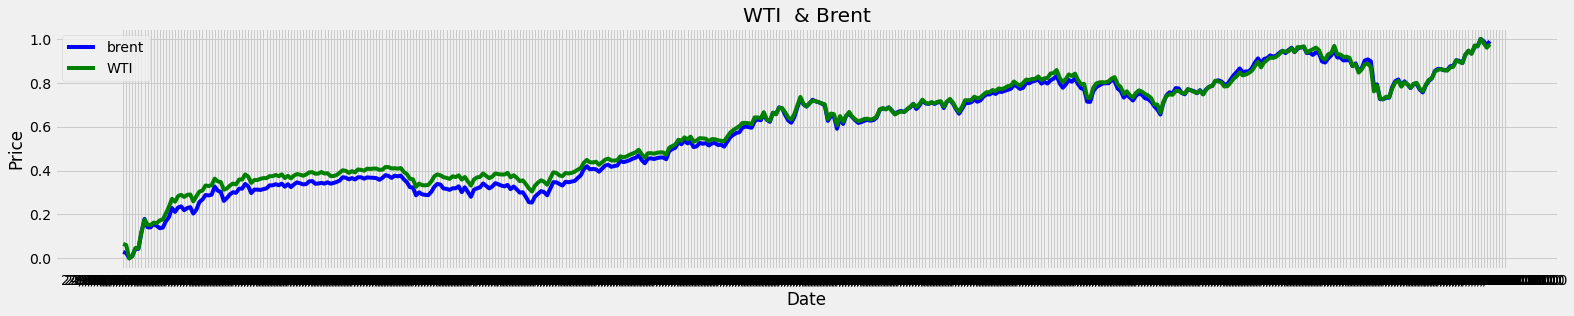

In [ ]:
fig = plt.figure(figsize=(24, 24))
ax = fig.add_subplot(5,1,i+1)
ax.plot(data.index,data_scaled[:,2],label=data.columns[2],c='blue')
ax.plot(data.index,data_scaled[:,0],label='WTI',c='green')
ax.set_title('WTI  & Brent')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

In [ ]:
data_train, data_test=train_test_split(wti3, train_size=0.8)

In [ ]:
data_train, data_valid=train_test_split(data_train, train_size=0.6)

In [ ]:
data_train.shape

(215,)

In [ ]:
data_valid.shape

(144,)

In [ ]:
wti2

,ouv,haut,bas,clot,vol,devise
date,,,,,,
24/04/2020 00:00,17.39,17.96,15.64,17.13,42792,USD
27/04/2020 00:00,16.94,16.94,11.89,12.87,53161,USD
28/04/2020 00:00,12.47,13.70,10.08,13.25,62146,USD
29/04/2020 00:00,13.21,16.77,13.15,15.57,38829,USD
30/04/2020 00:00,15.95,19.42,15.66,19.32,28103,USD
...,...,...,...,...,...,...
18/01/2022 00:00,84.23,85.91,84.23,85.91,13602,USD
19/01/2022 00:00,86.76,87.47,85.82,86.92,3200,USD
20/01/2022 00:00,85.25,87.10,84.21,84.41,50319,USD


In [ ]:
wti5=wti.iloc[:,1:2].values
training_data_len = math.ceil(len(wti5)*.8)
training_data_len

1022

In [ ]:
wti_scaled= sc.fit_transform(wti5)
wti_scaled

array([[0.54019249],
       [0.53910804],
       [0.54710587],
       ...,
       [0.99498441],
       [0.9738376 ],
       [0.98129321]])

In [ ]:
train_data = wti_scaled[0:training_data_len,:]
x_train = []
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.54019249, 0.53910804, 0.54710587, 0.54737698, 0.53897248,
       0.54032805, 0.5466992 , 0.55090145, 0.54927477, 0.54805476,
       0.53571913, 0.52826352, 0.53558357, 0.54900366, 0.54480141,
       0.54236139, 0.53965026, 0.54073472, 0.53965026, 0.54954589,
       0.5603904 , 0.55442592, 0.55876373, 0.5529348 , 0.55442592,
       0.54927477, 0.5519859 , 0.5435814 , 0.53802359, 0.54019249,
       0.54317473, 0.53165243, 0.50345669, 0.49369662, 0.47417649,
       0.47566762, 0.47973431, 0.48678325, 0.48122543, 0.47444761,
       0.48502101, 0.46929646, 0.47146537, 0.46766978, 0.46834757,
       0.47512539, 0.48583435, 0.4984411 , 0.50291446, 0.50332113,
       0.51037007, 0.51769012, 0.51674122, 0.53178799, 0.53449912,
       0.53883693, 0.54303918, 0.53788803, 0.53056798, 0.52745018])]
[0.5107767385115901]

[array([0.54019249, 0.53910804, 0.54710587, 0.54737698, 0.53897248,
       0.54032805, 0.5466992 , 0.55090145, 0.54927477, 0.54805476,
       0.53571913, 0.52826352, 0.535

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(962, 60, 1)

In [ ]:
from typing import Sequence
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=50, batch_size=7)

Epoch 1/50
138/138 [==============================] - 14s 60ms/step - loss: 0.0117 - accuracy: 0.0010
Epoch 2/50
138/138 [==============================] - 8s 59ms/step - loss: 0.0028 - accuracy: 0.0010
Epoch 3/50
138/138 [==============================] - 8s 59ms/step - loss: 0.0018 - accuracy: 0.0010
Epoch 4/50
138/138 [==============================] - 8s 59ms/step - loss: 0.0016 - accuracy: 0.0010
Epoch 5/50
138/138 [==============================] - 8s 59ms/step - loss: 0.0015 - accuracy: 0.0010
Epoch 6/50
138/138 [==============================] - 8s 59ms/step - loss: 0.0012 - accuracy: 0.0010
Epoch 7/50
138/138 [==============================] - 8s 59ms/step - loss: 0.0010 - accuracy: 0.0010
Epoch 8/50
138/138 [==============================] - 8s 59ms/step - loss: 0.0010 - accuracy: 0.0010
Epoch 9/50
138/138 [==============================] - 8s 59ms/step - loss: 0.0010 - accuracy: 0.0010
Epoch 10/50
138/138 [==============================] - 8s 59ms/step - loss: 6.9161e-04 - a

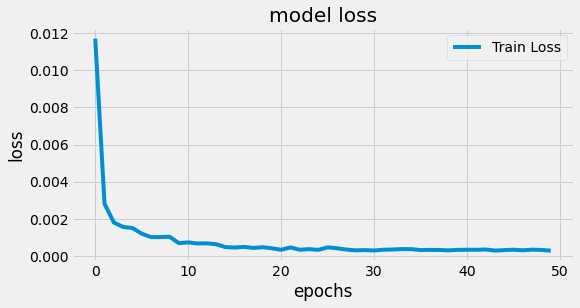

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [ ]:
test_data = wti_scaled[training_data_len - 60: , :]

#creating x_test and y_tets datasets
x_test = []
y_test = wti5[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i -60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)

In [ ]:
mse = mean_squared_error(y_test,predictions)
mse

1.57867620602201

In [ ]:
print(predictions)

[[53.338932]
 [53.390083]
 [53.6819  ]
 [53.29446 ]
 [53.869385]
 [55.470078]
 [56.555237]
 [56.72133 ]
 [57.471207]
 [58.340908]
 [58.842068]
 [59.115067]
 [58.88366 ]
 [60.141262]
 [61.197765]
 [60.39513 ]
 [61.967014]
 [62.270153]
 [60.16652 ]
 [62.258434]
 [63.13396 ]
 [63.692944]
 [63.87604 ]
 [63.413773]
 [62.972897]
 [61.104122]
 [62.3609  ]
 [65.27462 ]
 [66.492226]
 [68.10482 ]
 [65.47865 ]
 [64.8648  ]
 [66.53037 ]
 [66.27346 ]
 [66.587326]
 [65.24783 ]
 [65.463585]
 [64.55272 ]
 [61.181347]
 [62.394398]
 [61.059143]
 [61.497776]
 [60.63085 ]
 [61.43393 ]
 [61.63281 ]
 [62.070145]
 [60.99637 ]
 [61.908653]
 [60.776707]
 [60.112488]
 [60.041298]
 [60.070374]
 [60.961437]
 [60.58001 ]
 [63.833046]
 [63.394382]
 [63.863785]
 [63.50144 ]
 [64.6012  ]
 [62.318813]
 [62.05802 ]
 [62.60946 ]
 [62.335396]
 [63.49637 ]
 [64.58262 ]
 [65.46998 ]
 [64.631805]
 [64.69037 ]
 [66.353004]
 [66.75264 ]
 [65.88894 ]
 [65.2153  ]
 [65.934845]
 [65.41632 ]
 [66.88979 ]
 [65.52283 ]
 [65.57834 ]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


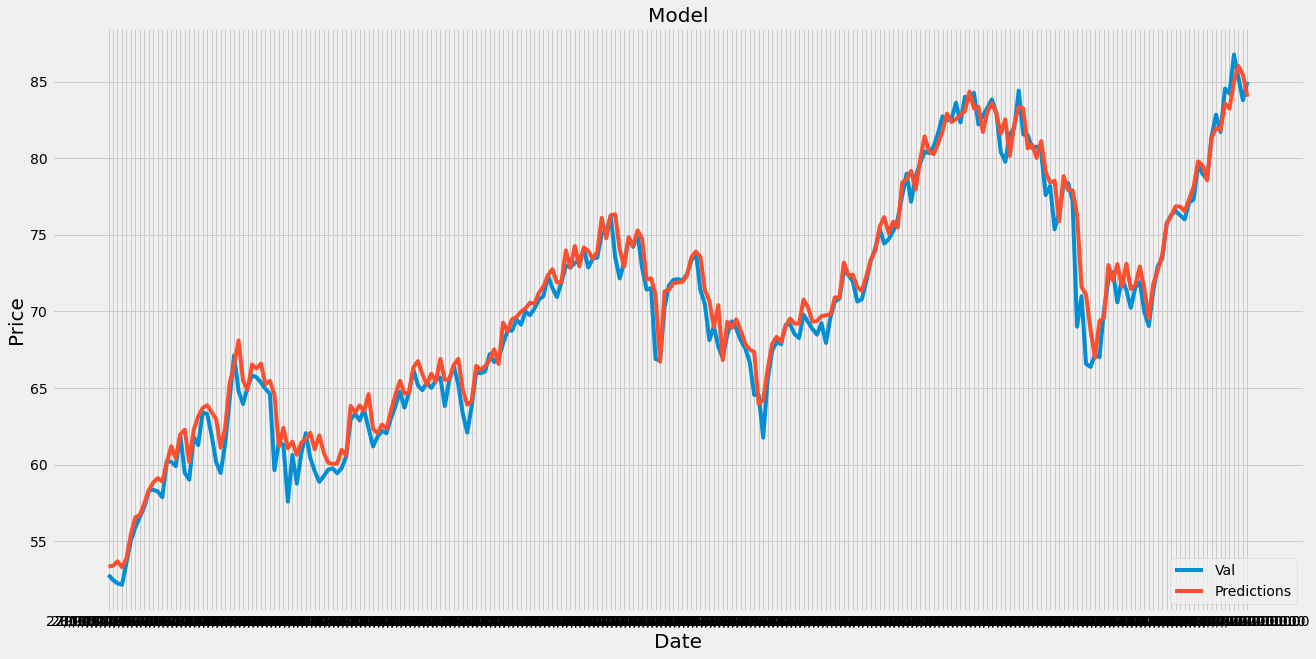

In [ ]:
train = wti[:training_data_len]
valid = wti[training_data_len:]
valid['Predictions'] = predictions

#visualization
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.plot(valid[['ouv', 'Predictions']])
plt.legend(['Val','Predictions'], loc='lower right')
plt.show()